
# Clouds 3D dev - Graphs

Reconstruct and event with clouds, step by step.

Didactic and debugin purposes.

#### JA Hernando, April 2021

In [80]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [81]:
import numpy             as np
import matplotlib.pyplot as plt

import clouds.clouds    as clouds
import clouds.graphs    as graphs
import clouds.pltclouds as pltclouds

import clouds.ridges    as ridges

In [82]:
plt.rcParams['image.cmap'] = 'Blues'

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Tue May 11 18:00:49 2021


## Generate an event


Generate points along a line with a given dispersion in (x, y)

## Generate sample

In [83]:
def generate_points(sizes, line = None, sigma = 1):
    
    size0   = np.min(sizes)
    npoints = len(sizes)
    ts = np.linspace(0, 1., npoints)
    ts = [ni * [ti,] for ni, ti in zip(sizes, ts)]
    ts.append(np.random.uniform(size = size0))
    ts = np.concatenate(ts)

    size = len(ts)
    iden = lambda x: x
    x, y, z = (iden, iden, iden) if line is None else line
    xs   = x(ts) + sigma * np.random.normal(size = size)
    ys   = y(ts) + sigma * np.random.normal(size = size)
    zs   = z(ts) + sigma * np.random.normal(size = size)
    
    return xs, ys, zs

In [84]:
sizes = 1000 * np.array((2, 2, 3, 3, 2, 2))
scale, offset = 5, 2
line  = lambda x: scale * x,  lambda x: offset + scale * x, lambda x: -offset + scale * x
xs, ys, zs = generate_points(sizes, line, sigma = 0.6)

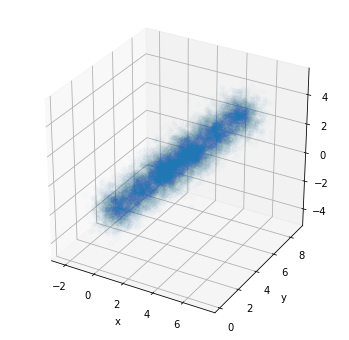

In [85]:
plt.figure(figsize = (6, 6))
ax = plt.gca(projection = '3d')

ax.scatter(xs, ys, zs, alpha = 0.01);
plt.xlabel('x'); plt.ylabel('y');

## Clouds input

   * Input data are:
       
       * coors   : a list of coordinates of the points: (x, y)
       
       * steps   : a list with the steps in each dimention (x-step, y-step)
       
       * weights : the weigths or energy of each point (ene)

In [86]:
coors   = (xs, ys, zs)
steps   = (0.5, 0.5, 0.5)
weights = np.ones(len(xs))

## 1 Clouds - Nodes

   1. Construct the 'energy' histogram in voxels with step size
   
   2. Select the cells with energy above a given threshold (default 0.) 
   
   3. Asign an ID to each cell
      
   4. Compute the magnitude of the gradient in each cell.
   
   5. Compute the gradient to the next neighbour for each cell
   
   6. Compute the nodes, the cells with no gradient to other neighbours.
   
   7. Compute the node to which each cell belongs. 
   

### Potential and cells IDs

   * *bins*  : is a list with the bin-edges in each dimension
   
   * *mask*  : a ndim-array with the True/False position of each cell
   
   * *icells*: is a list of the i-positions in each dimension
   
   * *cells* : is a list with the positions in each dimension 
   
   * *ene*   : is the potential/energy of each cell
   
   * *kid*   : is an ID, an int, for each cell

In [88]:
steps = (0.5, 0.5, 0.5)
bins, mask, cells, df = clouds.clouds(coors, steps, weights)

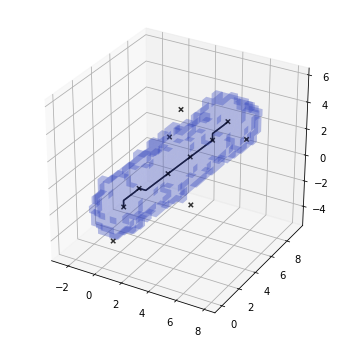

In [91]:
plt.figure(figsize = (6, 6))
draw = pltclouds.draw_cloud(cells, bins, df)

In [101]:
enes = df.energy.values
graph = graphs._graph(bins, mask, cells, enes)

[(491, 577), (404, 323), (745, 830), (831, 907), (238, 164)]


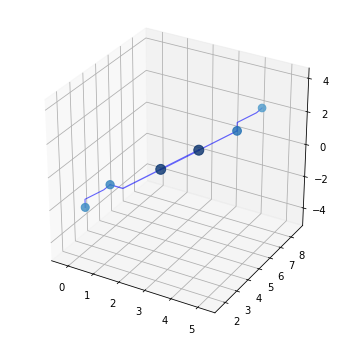

In [102]:
epath = graph.epath
nlink = graph.nlink

plt.figure(figsize = (6, 6))
pltclouds.draw_graph(cells, enes, epath, nlink);